In [23]:
### 🔧 TAREA
# Compara el desempeño de la red neuronal con la regresión logística. Analiza sus métricas, curva ROC y precisión vs. recall.

In [24]:
import sys
sys.path.append("../src")

import train
import model
import utils
import evaluate as ev

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [25]:
# 🔧 Cargar configuración
config = train.load_config("../config.yaml")

In [26]:
# 📦 Cargar y preparar los datos
X, y = train.load_data("../data/cs-training.csv")
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

In [27]:
# 🧪 Entrenar modelo base (Regresión Logística)
base_model = LogisticRegression(max_iter=1000)
base_model.fit(X_train, y_train)

# 🔍 Predicciones del modelo base
y_pred_log = base_model.predict(X_test)
y_proba_log = base_model.predict_proba(X_test)[:, 1]

In [28]:
# 📥 Cargar modelo entrenado Red Neuronal
from tensorflow.keras.models import load_model
nn_model = load_model("../models/nn_model.keras")

# 🔍 Predicciones de Red Neuronal
y_proba_nn = nn_model.predict(X_test).flatten()
y_pred_nn = ev.predict_with_threshold(y_proba_nn, threshold=0.5)

938/938 [==============================] - 2s 2ms/step


In [29]:
# 📊 Evaluación individual
ev.evaluate_model(y_test, y_pred_log, y_proba_log, model_name="Regresión Logística")
ev.evaluate_model(y_test, y_pred_nn, y_proba_nn, model_name="Red Neuronal")


📊 Evaluación del modelo: Regresión Logística
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     27995
           1       0.58      0.04      0.08      2005

    accuracy                           0.93     30000
   macro avg       0.76      0.52      0.52     30000
weighted avg       0.91      0.93      0.91     30000

F1 Score     : 0.0825
Precision    : 0.5817
Recall       : 0.0444
ROC AUC      : 0.7145

📊 Evaluación del modelo: Red Neuronal
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27995
           1       0.57      0.19      0.28      2005

    accuracy                           0.94     30000
   macro avg       0.76      0.59      0.62     30000
weighted avg       0.92      0.94      0.92     30000

F1 Score     : 0.2827
Precision    : 0.5695
Recall       : 0.1880
ROC AUC      : 0.8374


{'f1': 0.2827146606674166,
 'precision': 0.5694864048338368,
 'recall': 0.18802992518703243,
 'roc_auc': 0.837398778460172}

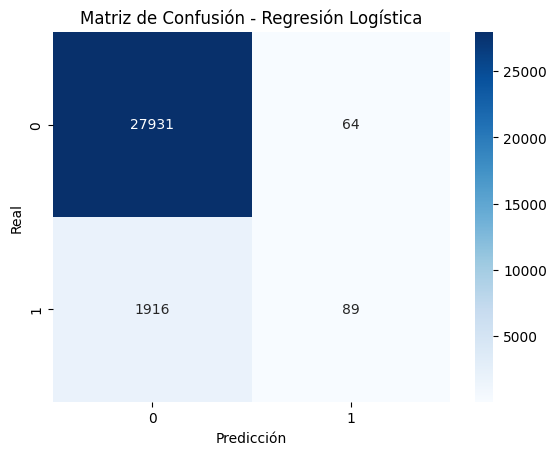

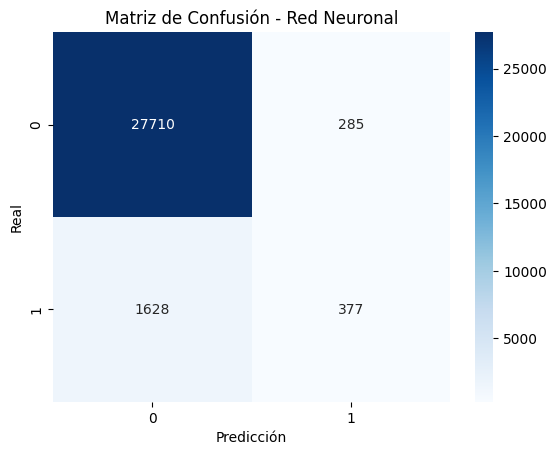

In [30]:
# 🧱 Matrices de Confusión
ev.plot_confusion_matrix(y_test, y_pred_log, model_name="Regresión Logística")
ev.plot_confusion_matrix(y_test, y_pred_nn, model_name="Red Neuronal")

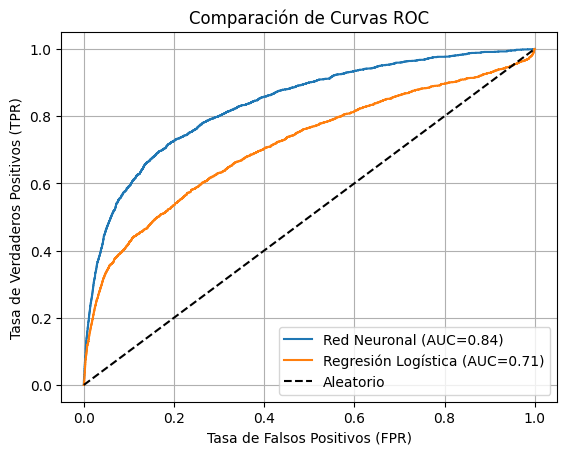

In [31]:
# 📈 Comparación de curvas ROC
ev.plot_roc_comparison(y_test, y_proba_nn, y_test, y_proba_log,
                       label1="Red Neuronal", label2="Regresión Logística")

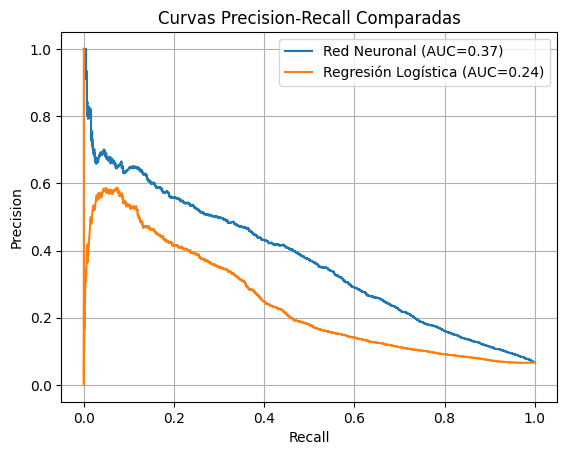

In [32]:
# 🔍 Comparación de curvas Precision-Recall
ev.plot_precision_recall_curves(y_test, y_proba_nn, y_test, y_proba_log,
                                 label1="Red Neuronal", label2="Regresión Logística")

In [33]:
# 📋 Comparación de métricas en tabla
df_metrics = ev.compare_models_metrics(
    y_test, y_pred_nn, y_proba_nn,
    y_test, y_pred_log, y_proba_log,
    model_name_1="Red Neuronal",
    model_name_2="Regresión Logística"
)

import IPython.display as display
display.display(df_metrics)

,Modelo,Precision,Recall,F1-score,ROC AUC
0,Red Neuronal,0.569486,0.188030,0.282715,0.837399
1,Regresión Logística,0.581699,0.044389,0.082484,0.714503


In [34]:
### 📊 Pregunta de reflexión
#¿En qué umbral se maximiza el F1-score para cada modelo? ¿Te parece razonable utilizar 0.5 como punto de corte en este contexto?
#¿Es uno de los modelos más conservador o arriesgado que el otro?

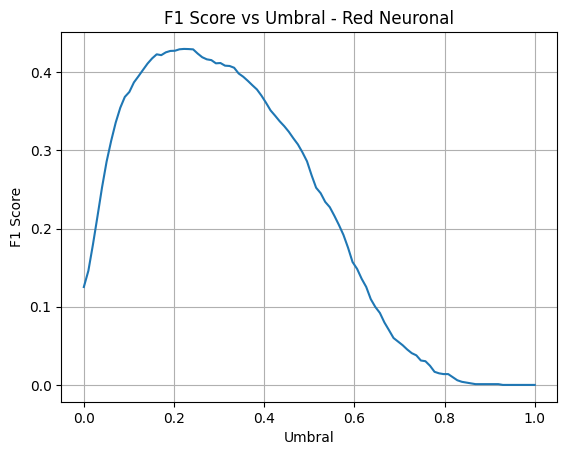

In [35]:
# ¿En qué umbral se maximiza el F1-score para cada modelo?
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


thresholds = np.linspace(0, 1, 100)
f1_scores = [f1_score(y_test, y_proba_nn >= t) for t in thresholds]

plt.plot(thresholds, f1_scores)
plt.xlabel("Umbral")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Umbral - Red Neuronal")
plt.grid()
plt.show()


In [36]:
# 🔍 Encontrar el mejor umbral para la Red Neuronal
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"🔴 Mejor umbral Red Neuronal: {best_threshold:.2f}")
print(f"🔴 F1-score máximo Red Neuronal: {best_f1:.4f}")


🔴 Mejor umbral Red Neuronal: 0.22
🔴 F1-score máximo Red Neuronal: 0.4300


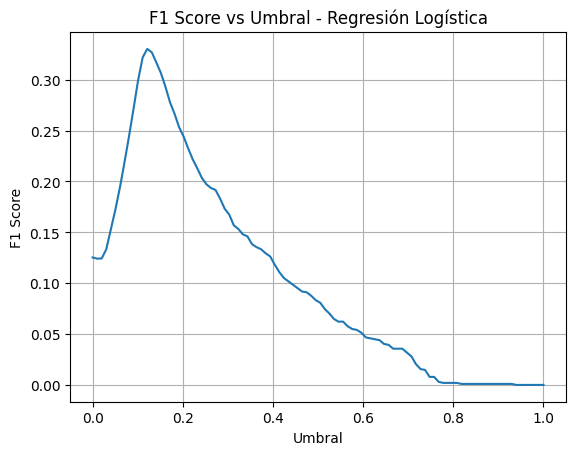

🟠 Mejor umbral Regresión Logística: 0.12
🟠 F1-score máximo Regresión Logística: 0.3303


In [37]:
# 🔍 Calcular curva F1 para la Regresión Logística
f1_scores_log = [f1_score(y_test, y_proba_log >= t) for t in thresholds]

plt.plot(thresholds, f1_scores_log)
plt.xlabel("Umbral")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Umbral - Regresión Logística")
plt.grid()
plt.show()

# 🧮 Encontrar el mejor umbral
best_idx_log = np.argmax(f1_scores_log)
best_threshold_log = thresholds[best_idx_log]
best_f1_log = f1_scores_log[best_idx_log]

print(f"🟠 Mejor umbral Regresión Logística: {best_threshold_log:.2f}")
print(f"🟠 F1-score máximo Regresión Logística: {best_f1_log:.4f}")


Esto significa que ambos modelos rinden mejor si usamos un umbral más bajo que el tradicional 0.5 para clasificar como clase positiva (1). Esto es común cuando hay desbalance de clases, ya que un umbral más bajo mejora el recall a costa de reducir algo de precisión.

 ¿Te parece razonable usar 0.5 como punto de corte?
No del todo. Si el objetivo es maximizar el F1-score (un equilibrio entre precisión y recall), los valores óptimos encontrados (0.22 para la red y 0.12 para regresión logística) son mejores opciones. Usar 0.5 te daría un F1-score mucho más bajo, especialmente en el caso de la regresión logística (solo 0.08 en el reporte original).

¿Cuál modelo es más conservador o arriesgado?
Regresión Logística (más conservador):
Con un umbral de 0.5, casi nunca predice clase 1 (muy bajo recall, 0.04), lo que indica un sesgo fuerte hacia la clase 0. Tiende a minimizar falsos positivos, aunque pierde muchos verdaderos positivos.

Red Neuronal (más balanceada):
Aunque también tiene cierto sesgo, logra mejorar recall a 0.19, sacrificando un poco de precisión, pero en general logra un balance mejor. Con el umbral óptimo (0.22), su rendimiento mejora notablemente.

In [38]:
# Umbrales óptimos obtenidos
threshold_nn = 0.22
threshold_log = 0.12

# Predicciones finales usando los mejores umbrales
y_pred_nn_opt = (y_proba_nn >= threshold_nn).astype(int)
y_pred_log_opt = (y_proba_log >= threshold_log).astype(int)


In [41]:
df_metrics_opt = ev.compare_models_metrics(
    y_test, y_pred_nn_opt, y_proba_nn,
    y_test, y_pred_log_opt, y_proba_log,
    model_name_1="Red Neuronal (opt)",
    model_name_2="Regresión Logística (opt)"
)


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

# Red Neuronal
print("🔴 Evaluación Red Neuronal (umbral óptimo):")
print(classification_report(y_test, y_pred_nn_opt, digits=4))
print(confusion_matrix(y_test, y_pred_nn_opt))

# Regresión Logística
print("\n🟠 Evaluación Regresión Logística (umbral óptimo):")
print(classification_report(y_test, y_pred_log_opt, digits=4))
print(confusion_matrix(y_test, y_pred_log_opt))


🔴 Evaluación Red Neuronal (umbral óptimo):
              precision    recall  f1-score   support

           0     0.9612    0.9498    0.9555     27995
           1     0.3985    0.4643    0.4289      2005

    accuracy                         0.9174     30000
   macro avg     0.6799    0.7071    0.6922     30000
weighted avg     0.9236    0.9174    0.9203     30000

[[26590  1405]
 [ 1074   931]]

🟠 Evaluación Regresión Logística (umbral óptimo):
              precision    recall  f1-score   support

           0     0.9528    0.9466    0.9497     27995
           1     0.3166    0.3451    0.3302      2005

    accuracy                         0.9064     30000
   macro avg     0.6347    0.6459    0.6400     30000
weighted avg     0.9103    0.9064    0.9083     30000

[[26501  1494]
 [ 1313   692]]


In [45]:
# Aplicar los umbrales óptimos encontrados
y_pred_nn_opt = (y_proba_nn >= threshold_nn).astype(int)
y_pred_log_opt = (y_proba_log >= threshold_log).astype(int)

In [46]:
df_metrics_opt = ev.compare_models_metrics(
    y_test, y_pred_nn_opt, y_proba_nn,
    y_test, y_pred_log_opt, y_proba_log,
    model_name_1="Red Neuronal (opt)",
    model_name_2="Regresión Logística (opt)"
)

from IPython.display import display
display(df_metrics_opt)


,Modelo,Precision,Recall,F1-score,ROC AUC
0,Red Neuronal (opt),0.398545,0.464339,0.428933,0.837399
1,Regresión Logística (opt),0.316560,0.345137,0.330231,0.714503


 Conclusión
La red neuronal supera en todas las métricas a la regresión logística cuando se usan los umbrales óptimos.

En especial, el ROC AUC de la red neuronal es mucho más alto, lo que indica una mejor capacidad para distinguir entre clases.